# Ensembel from starter to Expert!

## Overview
![](https://miro.medium.com/max/1000/1*QDnOdWR7dL69rYVP3z0WaQ.png)
Image from: miro.medium.com



> In this notebook, I'll trying to build as many as Ensemble model for Kaggler
<br>

<code>Ensemble</code> is the method that ensembling same or different model to build powerful model<br>
Especially if you are kaggler then you must use Ensemble for hight performance and get highest score!<br>

We're going to learn about Vanilla Ensemble, Bagging, Boosting, XGBoost, LightGBM and Stacking
* Vanilla Ensemble
* Bagging
* Boosting
* XGBoost
* LightGBM
* Stacking

Okay Let's get it started~!


[[](http://)](http://)<h3 style="color:green">If you think this notebook is helpful, upvotes would be greatly appreciated :-) </h3>

## What is Ensemble?
* Emsemble is the method that makes many model & vote their results to get one score
* e.g. for regression problems, we try to get mean of many models
* <code>Mete Classifier</code> : meta_classifier is simply the classifier that makes a final prediction among all the predictions by using those predictions as features.
* <code>Stacking(Meta-ensemble)</code>: It involves combining the predictions from multiple machine learning models on the same dataset, like bagging and boosting.
* Ensemble **takes long time**, but it is really **powerful method**
* Especially for *structured dataset!*

<table><tr>
<td> <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6sEJxaMhsqcQkNKCUE7Zm45qhwVmPfYJ4Cw&usqp=CAU" alt="Drawing" style="width: 520px;"/> </td>
<td> <img src="https://machinelearningmastery.com/wp-content/uploads/2020/07/Example-of-Combining-Decision-Boundaries-Using-an-Ensemble.png" alt="Drawing" style="width: 550px;"/> </td>
</tr></table>

# Import Library

In [1]:
# Import Library

import numpy as np  # for linear algebra
import pandas as pd  # for dataframe

import matplotlib.pyplot as plt  # for visualization
import seaborn as sns
%matplotlib inline

# Pipelines for Training
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier  # for voting classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import GridSearchCV  # for hyperparameter search

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report  # for report


import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing (Using Pipelines)
* Load Data
* Remove Null Values
* Feature Engineering

In [2]:
# Load Data & Remove rows
X = pd.read_csv("../input/titanic/train.csv", index_col='PassengerId')
X_test = pd.read_csv("../input/titanic/test.csv", index_col='PassengerId')

# Remove rows
X.dropna(axis=0, subset=['Survived'], inplace=True)
y = X.Survived
X.drop(labels=['Survived'], axis=1, inplace=True)

# "Cardinality" means the number of unique values in columns
# Select categorical columns with relatively low cardinality
categorical_cols = [cname for cname in  X.columns if X[cname].nunique() < 10 and X[cname].dtype=='object']
# Select numerical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ["int64", "float64"]]

# keep selected columns only
my_cols = categorical_cols + numerical_cols
X = X[my_cols].copy()
X_test = X_test[my_cols].copy()

In [3]:
print(X.shape, y.shape, X_test.shape)

(891, 7) (891,) (418, 7)


<AxesSubplot:xlabel='Survived', ylabel='count'>

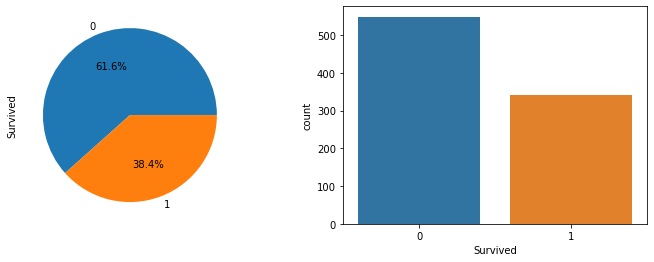

In [4]:
X_ = pd.read_csv('../input/titanic/train.csv')

f, ax = plt.subplots(1, 2, figsize=(12, 4))
X_['Survived'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
sns.countplot('Survived', data=X_, ax=ax[1])

### Pipelines for training
* numerical_transformer/categorical_transformer
* preprocessor(ColumnTransformer)
* define model
* Bundle preprocessing and modeling
* Preprocessing of training data, fit model
* Preprocessing of validation data, get predictions

In [5]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='most_frequent')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])  # pipeline steps: list of tuples that are chained, in the order in which they are chained

# Preprocessing for numerical and categorical data
# column transformer: Applies transformers to columns of an array or pandas DataFrame.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Baseline

* we need to define baseline for comparison

In [6]:
rf_clf = RandomForestClassifier()

# Bundle preprocessing and modeling code in a pipeline
# pipeline steps: list of tuples that are chained, in the order in which they are chained
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', rf_clf)])

print(cross_val_score(clf, X, y, cv=10).mean())

0.8115106117353308


In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
preds = clf.predict(X_val)

print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.77      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# 1. Voting Classifier
*a.k.a Majority Voting or Vanilla Ensemble*<br>

A <code>Voting Classifier</code> is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output

* Voting Classifier is basic Ensemble Classifier
* using Majority Voting

> Let's do it!

### Practice Voting Classifier

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
# Add Scaler
from sklearn.preprocessing import StandardScaler

clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = GaussianNB()

# Voting Classifier
clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('rf', clf2),
    ('gnb', clf3)],
    voting = 'hard')


eclf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', clf)
])

print(cross_val_score(eclf, X, y, cv=10).mean())

0.7968539325842697


# 2. Bagging
* <code>Bagging Classifiers</code> that are simply made with the same dataset are meaningless (e.g. if you consider multiple trees made with the same dataset, they will be made very similar and do not affect performance)
* The data we are seeing is only a fraction of the very large data
* Likewise, if we think of the sample itself as a population and create a model by sampling this population, we can make a very robust model.
* It would be good to apply it to malware classification research that lacks data.

## TL;DR
> Let's make various classifiers with various sampling datasets!

In [9]:
clf2 = DecisionTreeClassifier(random_state=42)
eclf2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('sacler', StandardScaler()),
    ('model', clf2)
])

print(cross_val_score(eclf2, X, y, cv=10).mean())

0.7912858926342073


# 3. Adaboost
*What is Boosting?*<br>

* Proceeding the training round, creating a model -> updating the weight of each row by model
* Model creation centered on rows with high instance weight (misclassified)
* Create an ensemble model from these models
* The purpose is to better categorize misclassified data.
<br>

> TL;DR - makes week learner stronger!

In [10]:
clf3 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
eclf3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', clf3)
])

print(cross_val_score(eclf3, X, y, cv=10).mean())

0.8059675405742821


# 4. Gradient Boosting
* Some kind of boosting technique like Adaboost
* can be used for both Regression, Classification
* Sequential + Additive Model
* Reinforcing the model with the residual of the previous model
* Weak learner developing by predicting residual

In [11]:
clf4 = GradientBoostingClassifier()
eclf4 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', clf4)
])

print(cross_val_score(eclf4, X, y, cv=10).mean())

0.8283021223470662


# 5. XGboost & LightGBM
* There is a package for parallel processing with GBM associative quantity.
* Representative packages are XGBoost and LightGBM
* <code>XGBoost</code>: eXtremeGradient Boosting
* <code>LightGBM</codE>: Light Gradient Boosting Machine
* Implementation algorithm differs in some parts, but the goal is similar
* Both are *Tree-based Gradient Boosting!!*
<br>

![XGBoost-LGB](https://image.slidesharecdn.com/xgboostandlightgbm-180201121028/95/xgboost-lightgbm-21-638.jpg?cb=1517487076)
from slidehsarecdn

## 5.1. XGBoost

In [12]:
clf5_1 = XGBClassifier()
eclf5_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', clf5_1)
])

print(cross_val_score(eclf5_1, X, y, cv=10).mean())

[01:50:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

0.8227215980024969

## 5.2. LightGBM

In [13]:
clf5_2 = LGBMClassifier()
eclf5_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', clf5_2)
])

print(cross_val_score(eclf5_2, X, y, cv=10).mean())

0.8226966292134831


# 6. Stacking
* Stack of estimators with final classifier
* Stacked generalization consists in stacking the output of individual estimator and use a classifier to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.



In [14]:
estimators = [
    ('voting_clf', clf1),
    ('bagging_clf', clf2),
    ('adaboost_clf', clf3),
    ('gb_clf', clf4),
    ('XGB_clf', clf5_1),
    ('LGBM_clf', clf5_2)]

stack_clf = StackingClassifier(estimators=estimators)

stack_clf_pip = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', stack_clf)
])

print(cross_val_score(stack_clf_pip, X, y, cv=10).mean())

[01:50:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

0.835043695380774

## Classification Report

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

stack_clf_pip.fit(X_train, y_train)
preds = stack_clf_pip.predict(X_val)

print(classification_report(y_val, preds))

[01:50:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:50:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

### AUC-ROC Curve

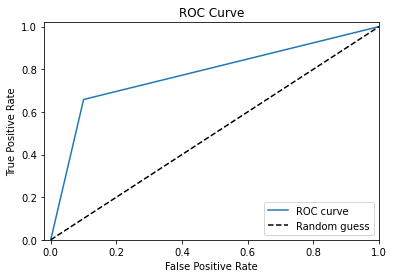

In [16]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_val,preds)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

## Interpretation
* Accuracy: 83%
* f1-score(macro avg): 81%
* f1-score(weighted avg): 82%
* for class 1, f1-score is relatively low...

# Conclusion

* In this tutorial we studied various Ensemble Model from sklearn
* Vanilla Ensemble, Voting Classifier, Bagging Classifier, Adaboost, XGBoost, lightGBM and Stacking
* <code>Stacking</code> is Stack of estimators with final classifier and gave us better results
* But But besides the ensemble, I think we have to learn a lot of things.
    * e.g. Hypterparameter tuning, Feature Engineering, etc...
* Therefore, in the next notebook, I'll look at the data a little more and do modeling and hyperparameter tuning :)

[[](http://)](http://)<h3 style="color:green">If you think this notebook is helpful, upvotes would be greatly appreciated :-) </h3>

## More about...
[[Model Evaluation]1. Classification Metrics](https://www.kaggle.com/leeyj0511/model-evaluation-1-classification-metrics)

[[for Starter] top 30%, Machine Learning Pipelines](https://www.kaggle.com/leeyj0511/for-starter-top-30-machine-learning-pipelines)